this file uses networkx package to draw graph view for sub-network for SPDEF, SIX1, and TFAP2D TF


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import os, sys
import networkx as nx

In [2]:
tf_dt = pd.read_csv('/stg3/data3/peiyao/work/20230922.Lina_lung/results/taiji/TF_MWU.txt',
                    index_col=0, )
tf_dt.iloc[:3, ]


,TF,pval,mean_cancer,mean_normal,fold_change,log2FC,pval.adjust
1,AC023509.3,0.149378,0.000009,0.000011,0.854486,-0.226872,0.552460
2,AC138696.1,0.054814,0.000013,0.000015,0.879914,-0.184566,0.469544
3,AHR,0.098957,0.000295,0.000224,1.317981,0.398330,0.499067


In [4]:
sig_TF_dt = tf_dt[(tf_dt['pval']<=0.05) &
                    ((tf_dt['log2FC']>=0.3) | (tf_dt['log2FC']<=-0.3))
].copy()
len(sig_TF_dt) # 68

68

In [3]:
# prep regulatees
dt_folder = '/stg3/data3/peiyao/work/20230922.Lina_lung/results/taiji/edges.2.20231019'
edge_dt_1 = pd.read_csv(os.path.join(
    dt_folder,
    'regulatee_list.pval_sig.txt'), sep='\t', )
edge_dt_2 = pd.read_csv(os.path.join(
    dt_folder,
    'regulatee_list.pval_sig.new_sig_TF.txt'), sep='\t', )
edge_dt_3 = pd.read_csv(os.path.join(
    dt_folder,
    'regulatee_list.pval_sig.new_new_sig_TF.txt'), sep='\t', )    

edge_dt = pd.concat((edge_dt_1, edge_dt_2, edge_dt_3), ignore_index=True, )


edge_dt.iloc[:3, ]


,start,end,specificity,diff,pval,exist_in_cancer,mean_cancer,std_cancer,exist_in_normal,mean_normal,std_normal
0,ARID3A,ABCD2,normal,-0.349036,0.000000,0,0.000000,0.000000,6,0.349036,0.302465
1,ARID3A,ABCG2,normal,-0.189381,0.000000,0,0.000000,0.000000,5,0.189381,0.120483
2,ARID3A,ABHD12,shared,-0.145894,0.043782,14,0.233115,0.149052,16,0.379009,0.242060


In [6]:
all(edge_dt['pval']<=0.05)

True

In [7]:
edge_dt = edge_dt[['start', 'end', 'diff']].copy()
len(edge_dt)

23985

In [8]:
edge_dt_sp = edge_dt[edge_dt['start']=='SPDEF'].copy()
print(len(edge_dt_sp)) # 180

edge_dt_sp2 = edge_dt[edge_dt['end'].isin(edge_dt_sp['end'])].copy()
# end nodes are SPDEF's regu, but these regu also targeted by other TFs (significant)
print(len(edge_dt_sp2)) # 497


180
497


In [9]:
# build graph based on edge_dt_sp2
G = nx.from_pandas_edgelist(edge_dt_sp2, 'start', 'end', edge_attr='diff', create_using=nx.DiGraph())
G


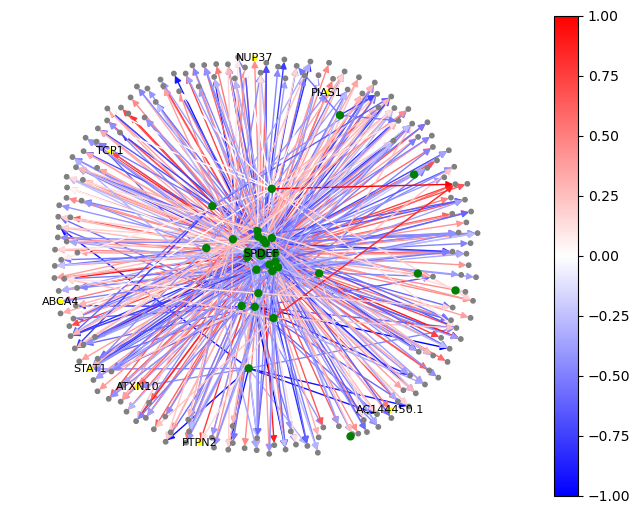

In [ ]:
selected_nodes = ['AC144450.1', 'ABCA4', 'ATXN10', 'TCP1', 'PIAS1',
                  'NUP37', 'STAT1', 'PTPN2', 'SEH1L',
                  'SNORA7B', 'SERINC2', 'RP11-523H20.3',
                  'RP11-773H22.4'] # special nodes to annotate
# Define node colors for A and B
node_colors = dict(
    [(lambda i : (i, 'gray'))(i) for i in list(edge_dt_sp2['end'])]
)
node_colors.update(
        dict(
            [(lambda i : (i, 'green'))(i) for i in list(edge_dt_sp2['start'])]
        )) # higher priority
node_colors.update(
        dict(
            [(lambda i : (i, 'yellow'))(i) for i in list(selected_nodes)]
        ))

# Define node sizes for A and B
node_sizes = dict(
    [(lambda i : (i, 10))(i) for i in list(edge_dt_sp2['end'])]
)
node_sizes.update(
    dict(
        [(lambda i : (i, 25))(i) for i in list(edge_dt_sp2['start'])]
    ))
node_sizes['SPDEF'] = 50


# Define a diverging colormap (e.g., 'bwr' for Blue-White-Red)
cmap = plt.cm.bwr

# Set the minimum and maximum values for the colormap
vmin = -1
vmax = 1

# Create a plot with the graph and edge colors
pos = nx.spring_layout(G)
edge_color_values = [d['diff'] for u, v, d in G.edges(data=True)]
node_color_values = [node_colors[node] for node in G.nodes]
node_size_values = [node_sizes[node] for node in G.nodes]
nx.draw(G, pos, 
        # with_labels=True, 
        font_weight='bold', 
        node_color=node_color_values,
        edge_color=edge_color_values, 
        node_size=node_size_values,
        cmap=cmap, edge_cmap=cmap, 
        vmin=vmin, vmax=vmax)

# Add a colorbar to show the mapping between edge values and colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

# Annotate and display labels only for selected nodes
selected_nodes = selected_nodes + ['SPDEF']
labels = {node: f'{node}' for node in selected_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black')




# Show the plot
# plt.show()
plt.savefig('/stg3/data3/peiyao/work/20230922.Lina_lung/results/SPDEF/graph.1.png', dpi=800, )

# Annotate and display labels only for selected nodes
selected_nodes = selected_nodes + ['SPDEF']
labels = {node: f'{node}' for node in selected_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black')
plt.savefig('/stg3/data3/peiyao/work/20230922.Lina_lung/results/SPDEF/graph.4_withLabel.png', dpi=800, )



In [27]:
G.edges(data=True)

OutEdgeDataView([('ARID3A', 'AC004510.3', {'diff': -0.183877981100316}), ('ARID3A', 'AC005540.3', {'diff': -0.2485953692001395}), ('ARID3A', 'AC013468.1', {'diff': -0.2426295339397554}), ('ARID3A', 'AC067945.2', {'diff': -0.1967609096833148}), ('ARID3A', 'AC093388.3', {'diff': -0.2375519677408907}), ('ARID3A', 'AL136985.1', {'diff': -0.1097745164704564}), ('ARID3A', 'FNTA', {'diff': -0.2681078949138008}), ('ARID3A', 'MRPS21', {'diff': -0.1965266114935729}), ('ARID3A', 'OSGEPL1', {'diff': -0.1712097006177255}), ('ARID3A', 'OSGEPL1-AS1', {'diff': -0.1712097006177255}), ('ARID3A', 'PRPF3', {'diff': -0.1965266114935729}), ('ARID3A', 'RP11-455J20.3', {'diff': -0.2107400855477163}), ('ARID3A', 'RP4-666F24.3', {'diff': -0.2696324715880421}), ('ARID3A', 'SRD5A3', {'diff': -0.4037753958406922}), ('ARID3A', 'TARS2', {'diff': -0.154510689522147}), ('ARID3A', 'TINAGL1', {'diff': -0.1760487710963659}), ('ARID3A', 'TRMT11', {'diff': -0.1852306686871404}), ('ARID3A', 'VDAC3', {'diff': -0.291010335860